In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud 

from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score

In [14]:
dataset = pd.read_csv("Corona_NLP_test.csv")

In [15]:
dataset['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

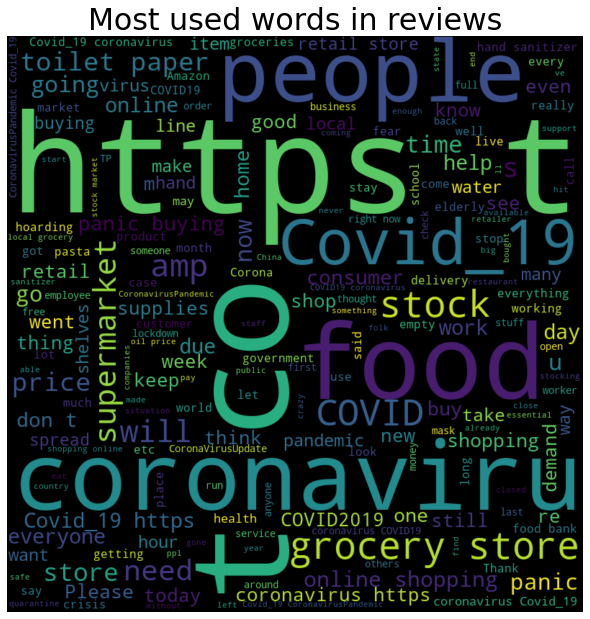

In [9]:
wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(dataset['OriginalTweet'].values))
    # plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Most used words in reviews',fontsize=30)
plt.show()
# wordCloud_generator(dataset['Review'], title="Most used words in reviews")

In [16]:
import re
import nltk
from nltk.corpus import stopwords   #To remove Non-essential words like the,is,are
from nltk.stem import WordNetLemmatizer  #To Stem the words, select keywords ignore different forms of the same word
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['OriginalTweet'][i])      #Replace Punctuation by Space
    review = review.lower()  #To transform to lower Case
    review = review.split() 
#     ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)] #Iterate through the entire list and if that word is in stopwords then skip that iteration
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus

['trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn sold online grocer foodkick maxdelivery coronavirus fearing shopper stock http co gr pcrlwh http co ivmkmsqdt',
 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concern driving price http co ygbipbflmy',
 'find protect loved one coronavirus',
 'panic buying hit newyork city anxious shopper stock food amp medical supply healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event http co iasiregpc qanon qanon qanon election cdc http co iszoewxu',
 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper http co sczryvvsih',
 'remember last time paid gallon regular gas los angeles price pump going look coronavirus impacting price pm abc http co pyzq ymuv',
 'voting age coronavirus hand sanitizer supertuesday 

In [30]:
W2V = Word2Vec(corpus)
words = W2V.wv.vocab
print(len(words))

27


In [31]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)
print(Y)

[0 4 1 ... 3 0 1]


In [33]:
print(len(X),len(y))

3798 3798


In [11]:
X_train , X_test , y_train, y_test = train_test_split (X,Y, test_size = .20, random_state = 0)

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[3 3]
 [4 2]
 [1 3]
 ...
 [0 0]
 [3 2]
 [2 0]]


In [14]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[51 15 29 18 11]
 [26 48 11 15 20]
 [57 33 27 47 27]
 [22 10 10 72 11]
 [44 60 18 41 37]]


0.3092105263157895

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.41      0.31       124
           1       0.29      0.40      0.34       120
           2       0.28      0.14      0.19       191
           3       0.37      0.58      0.45       125
           4       0.35      0.18      0.24       200

    accuracy                           0.31       760
   macro avg       0.31      0.34      0.31       760
weighted avg       0.31      0.31      0.29       760



In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

In [ ]:
y_pred = ann.predict(X_test).round()
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


In [ ]:
accs = accuracy_score(y_test,y_pred.round())
print(confusion_matrix(y_test,y_pred.round()),accs)

In [ ]:
print(classification_report(y_test, y_pred))